Create spatial file of Canadian jobs by dissemination area using jobs data from [this website](http://odesi2.scholarsportal.info/documentation/CENSUS/2016/cen16labour.html), dissemination area shapefile from [Stats Canada](https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm) and metropolitan areas shapefile from [Stats Canada](https://www12.statcan.gc.ca/census-recensement/2021/geo/sip-pis/boundary-limites/index2021-eng.cfm?year=21).

### Install/load packages

In [1]:
import pandas as pd
import geopandas as gpd
import glob
import os

### Load jobs data

In [26]:
path = "C:/Users/jpg23/data/downtownrecovery/lehd_new_downtowns/provinces/"
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for file in all_files:
    file_name = os.path.splitext(os.path.basename(file))[0]
    # print(file_name)
    dfn = pd.read_csv(file)
    dfn['province'] = file_name.replace('_jobs', '')
    li.append(dfn)

all_jobs = pd.concat(li, axis=0, ignore_index=True)
all_jobs = all_jobs[all_jobs['id'].str.contains('CSD')==False]

In [27]:
all_jobs.head()

,id,total_jobs,province
1,48010135,160,alberta
2,48010136,675,alberta
3,48010217,145,alberta
4,48010218,160,alberta
5,48010220,235,alberta


In [28]:
all_jobs.province.unique()

array(['alberta', 'british_columbia', 'manitoba', 'nova_scotia',
       'ontario', 'quebec'], dtype=object)

### Load 2016 dissemination area boundaries shapefile

In [29]:
da = gpd.read_file("C:/Users/jpg23/data/downtownrecovery/lehd_new_downtowns/canada_2016_DAs/lda_000b16a_e.shp")

In [62]:
da.head()

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,geometry
0,10010244,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010004.00,0004.00,10010014,"POLYGON ((8976851.149 2149576.543, 8976818.149..."
1,10010245,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010016.02,0016.02,10010010,"POLYGON ((8977202.180 2150836.794, 8977136.277..."
2,10010246,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010016.02,0016.02,10010010,"POLYGON ((8977549.383 2150892.566, 8977492.269..."
3,10010247,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010016.02,0016.02,10010010,"POLYGON ((8977682.314 2151083.183, 8977689.440..."
4,10010248,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,1001,Division No. 1,CDR,1001519,St. John's,1001519,St. John's,...,001,1,001,10001,St. John's,B,0010004.00,0004.00,10010014,"POLYGON ((8978152.474 2151142.586, 8978040.654..."


In [63]:
list(da.columns)

['DAUID',
 'PRUID',
 'PRNAME',
 'CDUID',
 'CDNAME',
 'CDTYPE',
 'CCSUID',
 'CCSNAME',
 'CSDUID',
 'CSDNAME',
 'CSDTYPE',
 'ERUID',
 'ERNAME',
 'SACCODE',
 'SACTYPE',
 'CMAUID',
 'CMAPUID',
 'CMANAME',
 'CMATYPE',
 'CTUID',
 'CTNAME',
 'ADAUID',
 'geometry']

In [34]:
da_simp = da[['DAUID', 'geometry']].rename(columns={"DAUID": "id"})

In [35]:
da_simp.head()

,id,geometry
0,10010244,"POLYGON ((8976851.149 2149576.543, 8976818.149..."
1,10010245,"POLYGON ((8977202.180 2150836.794, 8977136.277..."
2,10010246,"POLYGON ((8977549.383 2150892.566, 8977492.269..."
3,10010247,"POLYGON ((8977682.314 2151083.183, 8977689.440..."
4,10010248,"POLYGON ((8978152.474 2151142.586, 8978040.654..."


### Join jobs data with shapefile

In [36]:
da_simp.dtypes

id            object
geometry    geometry
dtype: object

In [37]:
all_jobs.dtypes

id            object
total_jobs    object
province      object
dtype: object

In [38]:
all_jobs.shape[0] 

35540

In [39]:
da_simp.shape[0]

56589

In [41]:
jobs_sf = da_simp.merge(all_jobs, how = 'inner', on = 'id')

In [42]:
jobs_sf.head()

,id,geometry,total_jobs,province
0,12030058,"POLYGON ((8238878.531 1324873.563, 8238907.634...",260,nova_scotia
1,12030046,"POLYGON ((8253427.683 1363509.783, 8253674.097...",255,nova_scotia
2,12030060,"POLYGON ((8244294.451 1319921.540, 8244300.554...",185,nova_scotia
3,12030062,"MULTIPOLYGON (((8241043.951 1331109.914, 82412...",70,nova_scotia
4,12030063,"POLYGON ((8243511.986 1324251.777, 8243512.574...",50,nova_scotia


In [43]:
jobs_sf.shape[0]

35310

### Subset to cities of interest

In [46]:
metros = gpd.read_file("C:/Users/jpg23/data/downtownrecovery/lehd_new_downtowns/canada_metro_areas/lcma000b21a_e.shp")[['CMANAME', 'geometry']]

In [47]:
metros.head()

,CMANAME,geometry
0,St. John's,"MULTIPOLYGON (((8967216.191 2136402.131, 89672..."
1,Grand Falls-Windsor,"POLYGON ((8715069.600 2159071.726, 8715064.097..."
2,Gander,"POLYGON ((8794489.877 2214683.869, 8795102.377..."
3,Corner Brook,"POLYGON ((8595903.940 2105395.523, 8595917.629..."
4,Charlottetown,"MULTIPOLYGON (((8374335.443 1629502.597, 83743..."


In [48]:
metros.CMANAME.unique()

array(["St. John's", 'Grand Falls-Windsor', 'Gander', 'Corner Brook',
       'Charlottetown', 'Summerside', 'Halifax', 'Kentville', 'Truro',
       'New Glasgow', 'Cape Breton', 'Moncton', 'Saint John',
       'Fredericton', 'Bathurst', 'Miramichi',
       'Campbellton (New Brunswick part / partie du Nouveau-Brunswick)',
       'Campbellton (partie du Québec / Quebec part)', 'Edmundston',
       'Matane', 'Rimouski', 'Rivière-du-Loup', 'Baie-Comeau', 'Saguenay',
       'Alma', 'Dolbeau-Mistassini', 'Sept-Îles', 'Québec',
       'Sainte-Marie', 'Saint-Georges', 'Thetford Mines', 'Sherbrooke',
       'Cowansville', 'Victoriaville', 'Trois-Rivières', 'Shawinigan',
       'Drummondville', 'Granby', 'Saint-Hyacinthe', 'Sorel-Tracy',
       'Joliette', 'Montréal', 'Salaberry-de-Valleyfield',
       'Sainte-Agathe-des-Monts', 'Lachute', "Val-d'Or", 'Amos',
       'Rouyn-Noranda', 'Cornwall',
       'Hawkesbury (partie du Québec / Quebec part)',
       "Hawkesbury (Ontario part / partie de l'O

In [53]:
city_list = ['Calgary', 'Edmonton', 'Halifax', 'London', 'Mississauga', 'Montréal', 'Ottawa', '^Québec$', 'Toronto', 'Vancouver', 'Winnipeg']
city_string = "|".join(city_list)
the_metros = metros[metros['CMANAME'].str.contains(city_string)]

Calgary|Edmonton|Halifax|London|Mississauga|Montréal|Ottawa|^Québec$|Toronto|Vancouver|Winnipeg


In [54]:
the_metros.CMANAME.unique() # Mississauga is within the Toronto CMA boundary

array(['Halifax', 'Québec', 'Montréal',
       'Ottawa - Gatineau (partie du Québec / Quebec part)',
       "Ottawa - Gatineau (Ontario part / partie de l'Ontario)",
       'Toronto', 'London', 'Winnipeg', 'Calgary', 'Edmonton',
       'Vancouver'], dtype=object)

In [55]:
# Do CRS match?
jobs_sf.crs == the_metros.crs

True

In [56]:
df_joined = gpd.sjoin(jobs_sf, the_metros, how = "inner").drop(columns = ['index_right'])

In [59]:
df_joined.head()

,id,geometry,total_jobs,province,CMANAME
39,12090733,"POLYGON ((8420792.991 1442444.806, 8420836.151...",895,nova_scotia,Halifax
44,12090267,"POLYGON ((8411796.443 1435497.926, 8411825.974...",105,nova_scotia,Halifax
45,12090270,"POLYGON ((8412191.611 1435034.623, 8412189.194...",60,nova_scotia,Halifax
77,12090521,"POLYGON ((8405601.426 1441711.983, 8405668.529...",260,nova_scotia,Halifax
78,12090523,"POLYGON ((8403102.949 1442184.369, 8403754.649...",100,nova_scotia,Halifax


<AxesSubplot:>

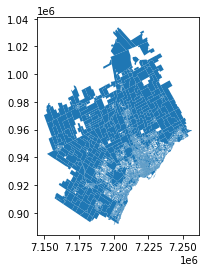

In [60]:
to_test = df_joined[df_joined['CMANAME']=='Toronto']
to_test.plot()

### Calculate geographic area of each DA

In [66]:
df_joined.crs

<Projected CRS: PROJCS["PCS_Lambert_Conformal_Conic",GEOGCS["NAD83 ...>
Name: PCS_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [71]:
df_joined['area'] = df_joined.geometry.area

In [91]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
df_joined.head()

In [74]:
df_joined.area.mean()

4930202.389536641

In [75]:
df_joined.area.median()

201211.69249287804

In [86]:
df_joined.dtypes

id              object
geometry      geometry
total_jobs     float64
province        object
CMANAME         object
area           float64
dtype: object

In [89]:
df_joined['total_jobs'] = df_joined['total_jobs'].str.replace(',', '').astype(float)
df_joined['jobs_per_sq_meter'] = df_joined['total_jobs']/df_joined['area']

### Export data

In [92]:
df_joined.head()

,id,geometry,total_jobs,province,CMANAME,area,jobs_per_sq_meter
39,12090733,"POLYGON ((8420792.991 1442444.806, 8420836.151...",895.000000,nova_scotia,Halifax,6502163.400023,0.000138
44,12090267,"POLYGON ((8411796.443 1435497.926, 8411825.974...",105.000000,nova_scotia,Halifax,246034.978523,0.000427
45,12090270,"POLYGON ((8412191.611 1435034.623, 8412189.194...",60.000000,nova_scotia,Halifax,129510.206110,0.000463
77,12090521,"POLYGON ((8405601.426 1441711.983, 8405668.529...",260.000000,nova_scotia,Halifax,827127.047769,0.000314
78,12090523,"POLYGON ((8403102.949 1442184.369, 8403754.649...",100.000000,nova_scotia,Halifax,1280013.674303,0.000078


In [93]:
df_joined.to_file("C:/Users/jpg23/data/downtownrecovery/lehd_new_downtowns/canada_DA_jobs.geojson", driver="GeoJSON")  